In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import random
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# input file directory
# dir = '/content/drive/MyDrive/Colab Notebooks/ML Assignments/Assignment5'
dir = '/content/drive/MyDrive'

In [5]:
# input file name
imageFile = "input.png" # 128 * 128 img
# read the image file with cv2 library
img = cv2.imread(dir + "/" + imageFile)

In [6]:
# Take the K as input parameter
k = int(input("Enter the number of clusters k: "))

Enter the number of clusters k: 3


In [9]:
# function to assign random k centroids
def random_K_centroids(data, k):
  height, width, channels = np.shape(data)
  centroids = []
  # select indexes without repetation
  height_sample = random.sample(range(height), k)
  width_sample = random.sample(range(width), k)
  for i in range(k):
    centroids.append(data[height_sample[i]][width_sample[i]])
  print(f"random centroids are: {centroids}")
  return centroids

# function to form k clusters based on minimum euclidean distance
def clustering(data, centroids):
  height, width, channels = np.shape(data)
  cluster = np.zeros((height, width))
  for h in range(height):
    for w in range(width):
      near_index = 0
      min_distance = None
      for index, j in enumerate(centroids):
        euclidean_dist = np.linalg.norm(data[h][w] - j)
        if min_distance == None:
          min_distance = euclidean_dist
          near_index = index
        elif min_distance > euclidean_dist:
          min_distance = euclidean_dist
          near_index = index
      cluster[h][w] = near_index
  return cluster

# Function to decides next centroids based on mean distance from each cluster
def next_center(data, centroids, clusters):
  height, width, channels = np.shape(data)
  new_centroids = []
  for index, i in enumerate(centroids):
    number_points = 0
    added_points = 0
    for h in range(height):
      for w in range(width):
        if int(clusters[h][w]) == index:
          number_points += 1
          added_points = np.add(added_points, data[h][w].astype('uint64'))
    new_centroid = 0
    if number_points == 0:
      new_centroid = i
    else:
      new_centroid = added_points/number_points
    new_centroids.append(new_centroid)
  return new_centroids

In [17]:
# initialize with k random centroids
K_centroids = random_K_centroids(img, k)
# set epoch as 100 for maximum threshold
epoch = 100
for i in range(epoch):
  # detect clusters
  cluters = clustering(img, K_centroids)
  # find next centroid points
  new_K_centroids = next_center(img, K_centroids, cluters)
  # difference between previous centroid points and currently updated centroid points
  diff = np.linalg.norm(np.array(K_centroids) - np.array(new_K_centroids))
  # update the centroid points
  K_centroids = new_K_centroids
  print("Current Centroids: ")
  print(K_centroids)
  print(f"Difference between previous centroids: {diff}\n")
  # if the difference is small enough, escape the loop
  if diff < 0.2:
    break

random centroids are: [array([25, 27, 27], dtype=uint8), array([18, 22, 21], dtype=uint8), array([40, 47, 40], dtype=uint8)]
Current Centroids: 
[array([34.96612595, 47.92127863, 56.04389313]), array([21.80720339, 26.61917373, 26.32891949]), array([111.41169355, 142.91653226, 165.35967742])]
Difference between previous centroids: 177.36814849091357

Current Centroids: 
[array([54.92150651, 62.27103133, 71.8905315 ]), array([22.8       , 25.28382749, 23.39110512]), array([127.66663277, 168.02094986, 195.93359097])]
Difference between previous centroids: 51.921740470553594

Current Centroids: 
[array([65.2384816 , 78.4308896 , 94.03013619]), array([24.79886013, 27.23771076, 25.44502493]), array([133.73079569, 176.27860582, 204.76840174])]
Difference between previous centroids: 32.44675043249665

Current Centroids: 
[array([ 72.24885042,  91.24695699, 112.10873681]), array([27.24783983, 29.62339305, 28.22423604]), array([138.4501385 , 181.93931   , 210.17967766])]
Difference between previ

In [18]:
# round up the color point
K_centroids = np.round(K_centroids)
print("Final top k common colors:")
print(K_centroids)
# assign closest color to each pixel
height, width, channels = np.shape(img)
new_img = copy.deepcopy(img)
for i in range(width):
  for j in range(height):
    pixel = img[j][i] # Read the pixel at location (i,j)
    min_distance = None
    for c in K_centroids:
      dist = np.linalg.norm(pixel - c)
      if min_distance == None:
        min_distance = dist
        new_img[j][i] = c
      elif min_distance > dist:
        min_distance = dist
        new_img[j][i] = c # Assign a new value to the pixel

Final top k common colors:
[[ 90. 129. 162.]
 [ 35.  38.  39.]
 [164. 204. 226.]]


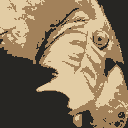

True

In [19]:
# show modified image
cv2_imshow(np.asarray(new_img))
# write output image
cv2.imwrite("output1.png", np.asarray(new_img))